<a href="https://colab.research.google.com/github/DorianD6/NBHV-G4360-Intro-Theory-2021/blob/main/Assignment_7_Dongrui_Deng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NBHV G4360 Introduction to Theoretical Neuroscience**

# **Assignment 7 by Dongrui Deng UNI:dd3001**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

## Problem 1: Information Theory - Entropy

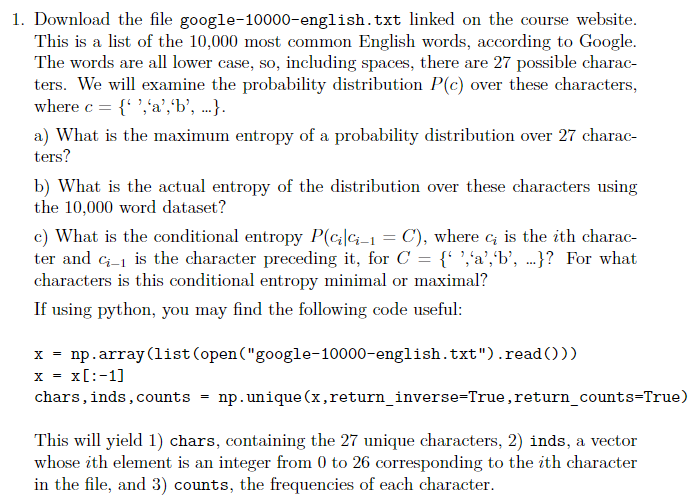

a) The maximum entropy will be given by a uniform distribution over 27 characters:

> $H = - \displaystyle \sum_{i=1}^{27} P(c_i) \log_2 P(c_i)= - \log_2 \frac{1}{27} = \log_2 27 ≈ 4.755$

b) The actual entropy of the distribution over these characters in the dataset can be obtained with: 

> $H = -E[\log_2 P(c_i)] =- \displaystyle \sum_{i=1}^{27} P(c_i) \log_2 P(c_i) $

In [1]:
# Upload Data Files
from google.colab import files
uploaded = files.upload()

Saving google-10000-english.txt to google-10000-english.txt


In [ ]:
x = np.array(list(open("google-10000-english.txt").read()))
x = x[:-1]
chars, inds, counts = np.unique(x, return_inverse=True, return_counts=True)

In [ ]:
P = counts/(np.sum(counts))
logP = np.log2(P)
H = -np.sum(P * logP)
print("The actural entropy =", H)

The actural entropy = 4.213100499254651


**Answer:** the actural entropy is $H = - \displaystyle \sum_{i=1}^{27} P(c_i) \log_2 P(c_i) ≈ 4.213$

c) The conditional entropy (entropy given a condition) can be calculated as: 

> $H({\bf c}|c=c_{i-1}) = - \displaystyle \sum_{i=1}^{27} P(c_i|c_{j=i-1}∈ C) \log_2 P(c_i |c_{j=i-1} ∈ C)$ for C = {' ', 'a', 'b', ···}


In [ ]:
counts_matrix = np.zeros([27, 27], dtype=int)
CP = np.zeros([27, 27])
# CP refers to conditional probability
for i in range(len(inds)):
  # we assume the last letter is preceding the first character in the file
  counts_matrix[inds[i], inds[i-1]] = counts_matrix[inds[i], inds[i-1]] + 1
for j in range(27):
  CP[:, j] = counts_matrix[:, j]/np.sum(counts_matrix[:, j])
logCP = np.log2(CP)
logCP = np.where(logCP == -np.inf, 0, logCP)
CH = -np.sum(CP * logCP, axis=0)
# CH refers to conditional entropy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log2
  if __name__ == '__main__':


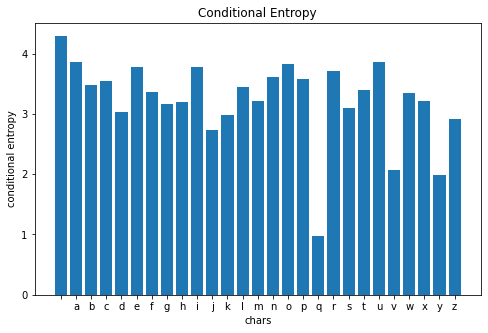

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(chars, CH)
plt.title("Conditional Entropy")
plt.xlabel("chars")
plt.ylabel("conditional entropy")
plt.show()

**Answer:** The space has the maximum conditional entropy followed by a while letter 'q' has the minimal value of conditional entropy. \
It obeys our intuition that it is more uncertain about what is followed after a space while normally a narrower set of letters can follow after 'q'.

## Problem 2: Optimization I - Gradient Descent

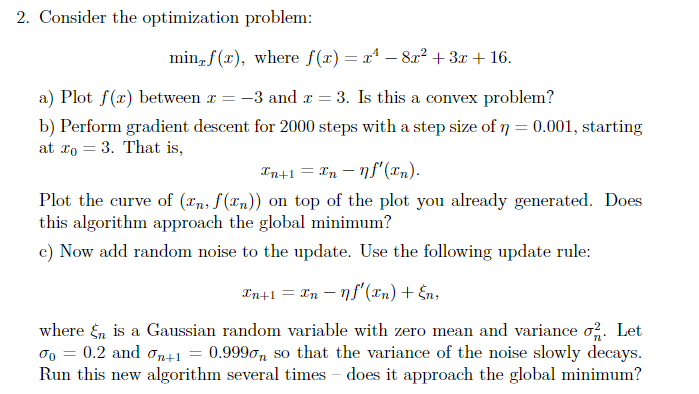

#### a) Plot f(x) between x=-3 and x=3

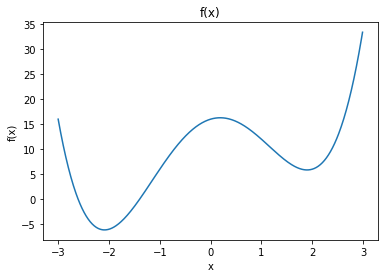

In [ ]:
x = np.arange(-3, 3, 0.01)
f = x**4 - 8*x**2 + 3*x + 16
plt.figure()
plt.plot(x, f)
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

**Answer:** The objective function is NOT a convex function and thus this is NOT a convex problem.

#### b) Perform gradient descent without noise when updating

> The derivative of f: $f'(x) = 4x^3 - 16x + 3$

In [ ]:
eta = 0.001
x_n = np.zeros(2000+1)
f_n = np.zeros(2000+1)
x_n[0] = 3.0
f_n[0] = (x_n[0])**4 - 8*(x_n[0])**2 + 3*x_n[0] + 16
for i in range(2000):
  df = 4*(x_n[i]**3) - 16*x_n[i] + 3
  x_n[i+1] = x_n[i] - eta * df
  f_n[i+1] = (x_n[i+1])**4 - 8*(x_n[i+1])**2 + 3*x_n[i+1] + 16

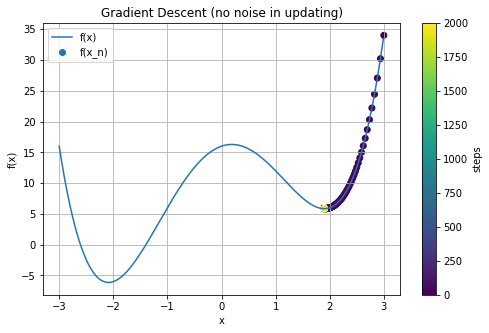

In [ ]:
plt.figure(figsize=(8,5))
colors = np.arange(2001)
plt.plot(x, f, label='f(x)')
plt.scatter(x_n, f_n, label='f(x_n)', c=colors)
plt.title("Gradient Descent (no noise in updating)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.colorbar(label="steps")
plt.grid()
plt.legend()
plt.show()

**Answer:** The algorithm dose not approach the global minimum.

#### c) Perform gradient descent with noise added to the update

In [ ]:
x_n = np.zeros([2000+1, 4])
f_n = np.zeros([2000+1, 4])
sigma = 0.2
x_n[0, :] = 3.0 * np.ones(4)
f_n[0, :] = ((x_n[0])**4 - 8*(x_n[0])**2 + 3*x_n[0] + 16) * np.ones(4)
for i in range(2000):
  df = 4*(x_n[i, :]**3) - 16*x_n[i, :] + 3
  x_n[i+1, :] = x_n[i, :] - eta * df * np.ones(4) + np.random.normal(0, sigma, 4)
  f_n[i+1, :] = (x_n[i+1, :])**4 - 8*(x_n[i+1, :])**2 + 3*x_n[i+1, :] + 16
  sigma = sigma * 0.999

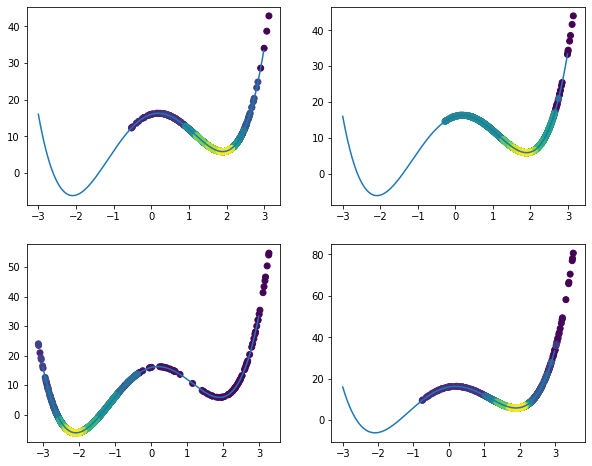

In [ ]:
plt.figure(figsize=(10,8))
ax1 = plt.subplot(221)
ax1.plot(x, f)
ax1.scatter(x_n[:, 0], f_n[:, 0], c=colors)

ax2 = plt.subplot(222)
ax2.plot(x, f)
ax2.scatter(x_n[:, 1], f_n[:, 1], c=colors)

ax3 = plt.subplot(223)
ax3.plot(x, f)
ax3.scatter(x_n[:, 2], f_n[:, 2], c=colors)

ax4 = plt.subplot(224)
ax4.plot(x, f)
ax4.scatter(x_n[:, 3], f_n[:, 3], c=colors)

plt.show()

**Answer:** The algorithm approaches the global minimum occationally.

## Problem 3: Optimization II - SVM: Support Vector Machine

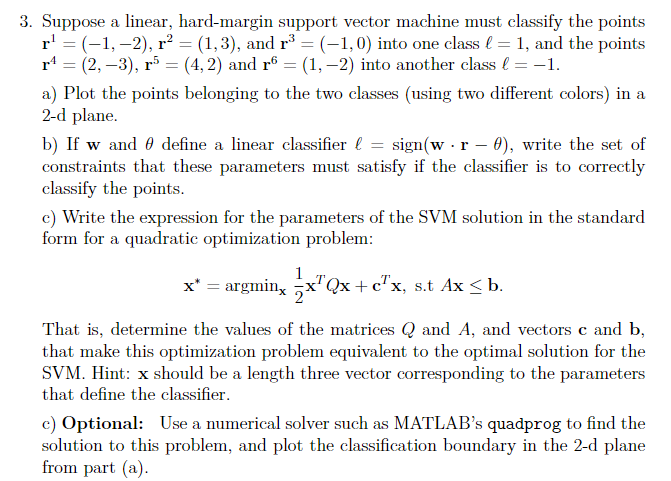

#### a) Plot the points belonging to the two classes

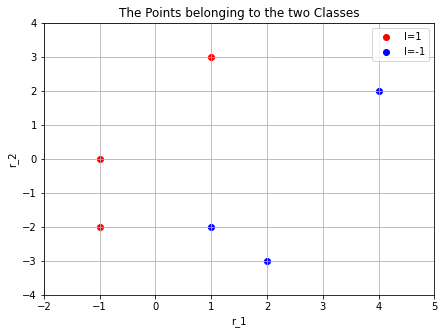

In [ ]:
plt.figure(figsize=(7,5))
r1 = np.array([[-1, -2],[1, 3],[-1, 0]])
r2 = np.array([[2, -3],[4, 2],[1, -2]])
plt.scatter(r1[:, 0], r1[:, 1], c='red', label='l=1')
plt.scatter(r2[:, 0], r2[:, 1], c='blue', label='l=-1')
plt.title("The Points belonging to the two Classes")
plt.xlim([-2, 5])
plt.ylim([-4, 4])
plt.xlabel("r_1")
plt.ylabel("r_2")
plt.grid()
plt.legend()
plt.show()

___________________________________________________________________

#### b) The set of constraints that these parameters **must** satisfy: 

(Here we only consider constraints but not the optimal solution for the classifying)

> $$ {\bf w}, θ \ satisfy \left\{
\begin{aligned}
{\bf w·r^1} - θ > 0, \  {\bf r^1} = (-1, -2) \\
{\bf w·r^2} - θ > 0, \  {\bf r^2} = \ \ \ \ \  (1,\ 3) \\
{\bf w·r^3} - θ > 0, \  {\bf r^3} = \ \ (-1, \ 0) \\
{\bf w·r^4} - θ < 0, \  {\bf r^4} = \ \ \ (2, -3) \\
{\bf w·r^5} - θ < 0, \  {\bf r^5} = \ \ \ \ \  (4,\ 2) \\
{\bf w·r^6} - θ < 0, \  {\bf r^6} = \ \ \ (1, -2)
\end{aligned}
\right.
$$

> $i.e. {\bf w·r^μ} - θ > 0 \ for \ μ=1, 2, 3$ while ${\bf w·r^μ} - θ < 0 \ for \ μ=4, 5, 6$ \\
> More concisely, $({\bf w·r^μ} - θ) l^μ > 0,\ l=[1, 1, 1, -1, -1, -1]$

#### c) Write the expression for the parameters of the SVM solution in the standard form for a quadratic optimization problem:

> Original optimization problem: ${\bf w^*}, θ^* = arg \displaystyle \min_{w, θ} {\bf w^Tw}$    $s.t. ({\bf w·r^μ} - \theta)l^μ \geq 1 \ {\Rightarrow} \ ||{\bf w^*}||=\frac{1}{m}$ \\
> Standard form for a quadratic optimization problem: ${\bf x*} = arg \displaystyle \min_{x} \frac{1}{2} {\bf x}^T Q{\bf x} + {\bf c^Tx}, s.t. A{\bf x} \leq {\bf b}$

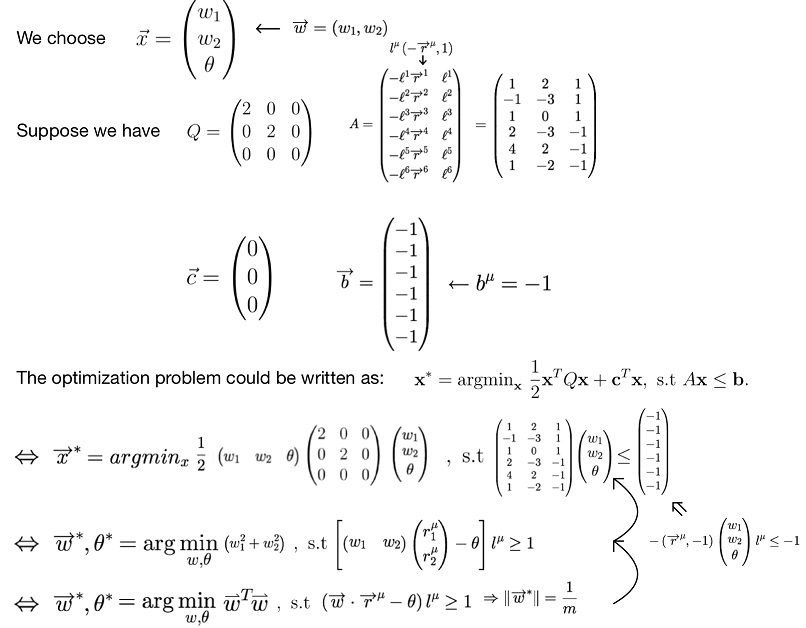

Use a numerical solver to find the solution to this problem

In [ ]:
pip install qpsolvers

In [ ]:
from qpsolvers import solve_qp

In [ ]:
P = np.array([[2., 0., 0.], [0., 2., 0.], [0., 0., 10e-5]])
q = np.array([0., 0., 0.]).reshape((3,))
G = np.array([[1., 2., 1.], [-1., -3., 1.], [1., 0., 1.], [2., -3., -1.], [4., 2., -1.], [1., -2., -1.]])
h = np.array([-1., -1., -1., -1., -1., -1.]).reshape((6,))
s = solve_qp(P, q, G, h)

In [ ]:
w_1 = s[0]
w_2 = s[1]
w = np.array([w_1, w_2])
theta = s[2]
print('w=', w)
print('θ=', theta)

w= [-1.   0.4]
θ= -0.8


Plot the classification boundary in the 2-d plane from part (a)

In [ ]:
x = np.arange(-2, 5, 0.01)
m = 1 / ((w[0]**2 + w[1]**2)**(1/2))
y = -(w[0]/w[1])*(x-w[0]*theta*(m**2)) + w[1]*theta*(m**2)
m

0.9284766908852594

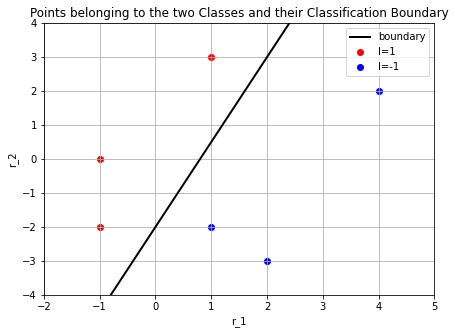

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(r1[:, 0], r1[:, 1], c='red', label='l=1')
plt.scatter(r2[:, 0], r2[:, 1], c='blue', label='l=-1')
plt.plot(x, y, color='black', linewidth=2, label="boundary")
plt.title("Points belonging to the two Classes and their Classification Boundary")
plt.xlim([-2, 5])
plt.ylim([-4, 4])
plt.xlabel("r_1")
plt.ylabel("r_2")
plt.grid()
plt.legend()
plt.show()

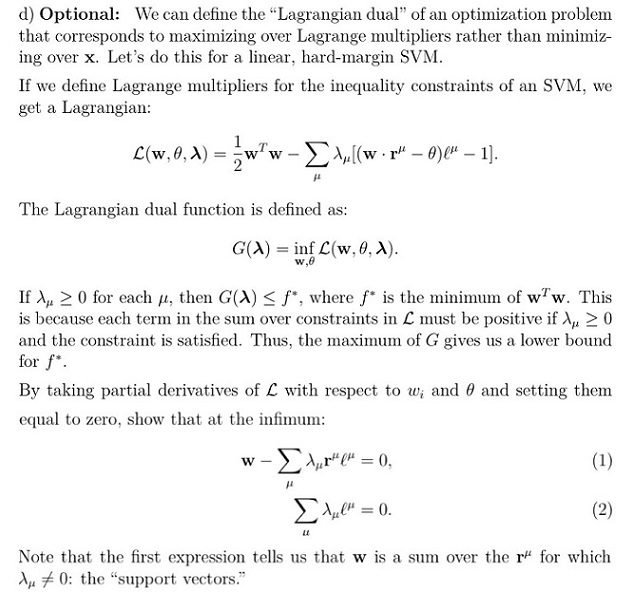

> $\mathscr{L}({\bf w}, θ, {\bf λ}) = \frac{1}{2} {\bf w}^T {\bf w} - \displaystyle \sum_μ {\lambda_\mu}[({\bf w·r^\mu} - θ)l^\mu -1]$

Take the partial derivative of $\mathscr{L}$ with respect to each component of $\bf w$ and set it to 0:
> $\frac{\partial}{\partial w_i}\mathscr{L}({\bf w}, θ, {\bf λ}) = w_i - \displaystyle \sum_μ {\lambda_\mu}{r_i^\mu}l^\mu = 0 \ \ (i=1,2)$

Taking all components of $\bf w$ and $\bf r$ into consideration we will obatin (1):

> ${\bf w} - \displaystyle \sum_μ {\lambda_\mu}{\bf r^\mu}l^\mu = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ {(1)}$

Take the partial derivative of $\mathscr{L}$ with respect to $\theta$ with setting it to 0 and we can obtain (2):

> $\frac{\partial}{\partial θ}\mathscr{L}({\bf w}, θ, {\bf λ}) = \displaystyle \sum_μ {\lambda_\mu}l^\mu = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (2)$



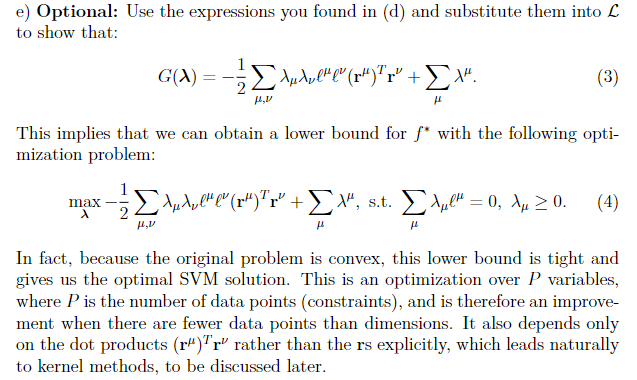

Plug (1) and (2) we obtained in (d) into $\mathscr L$:

i.e. substitute the following equations:

> ${\bf w} - \displaystyle \sum_μ {\lambda_\mu}{\bf r^\mu}l^\mu = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ {(1)}$ \\
> $\displaystyle \sum_μ {\lambda_\mu}l^\mu = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (2)$

into $\mathscr{L}({\bf w}, θ, {\bf λ}) = \frac{1}{2} {\bf w}^T {\bf w} - \displaystyle \sum_μ {\lambda_\mu}[({\bf w·r^\mu} - θ)l^\mu -1]$ and we get: \\

> $G({\bf λ}) = \frac{1}{2} \displaystyle \sum_{μ,ν} λ_μλ_νl^μl^ν({\bf r}^μ)^T{\bf r}^ν - (\sum_{μ,ν} λ_μλ_νl^μl^ν({\bf r}^μ)^T{\bf r}^ν - \sum_{μ} λ_μ$) \\
> $\ \ \ \ \ \ \ \ \ = - \frac{1}{2} \displaystyle \sum_{μ,ν} λ_μλ_νl^μl^ν({\bf r}^μ)^T{\bf r}^ν + \sum_{μ} λ_μ \ \ \ \ (3)$

Note: from (2) we know that $\displaystyle \sum_μ {\lambda_\mu}l^\muθ = \theta \sum_μ {\lambda_\mu}l^\mu = 0$
